# Sales Performance Report DQLab Store

Link to dataset: https://www.kaggle.com/datasets/dhawyfarrasputra/sales-performance-report-dqlab-store/code

## Import libraries

In [784]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [785]:
df = pd.read_csv('/Users/vivianchung/Desktop/projects/archive(17)/raw_data.csv')

In [786]:
df.head()

,order_id | order_status | customer | order_date | order_quantity | sales | discount | discount_value | product_category | product_sub_category |
0,+----------+-----------------+----------------...
1,| 3 | Order Finished | Muhammed MacInt...
2,| 293 | Order Finished | Barry French ...
3,| 483 | Order Finished | Clay Rozendal ...
4,| 515 | Order Finished | Carlos Soltero ...


In [787]:
df = df.drop(0).reset_index(drop=True)

In [788]:
df.columns

Index([' order_id | order_status    | customer               | order_date | order_quantity | sales     | discount | discount_value | product_category | product_sub_category           |'], dtype='object')

In [789]:
df1 = pd.DataFrame()

In [790]:
df1['order_id'] = df[' order_id | order_status    | customer               | order_date | order_quantity | sales     | discount | discount_value | product_category | product_sub_category           |']

In [791]:
df1['order_id'] = df1['order_id'].str.strip()
df1['order_id'] = df1['order_id'].str.lstrip('|')
df1['order_id'] = df1['order_id'].str.rstrip('|')
df1.head()

,order_id
0,3 | Order Finished | Muhammed MacInty...
1,293 | Order Finished | Barry French ...
2,483 | Order Finished | Clay Rozendal ...
3,515 | Order Finished | Carlos Soltero ...
4,613 | Order Finished | Carl Jackson ...


In [792]:
df1 = df1['order_id'].str.split('|', expand=True)
df1.head()

,0,1,2,3,4,5,6,7,8,9
0,3,Order Finished,Muhammed MacIntyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones and Communication
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders and Binder Accessories


In [793]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5500 non-null   object
 1   1       5499 non-null   object
 2   2       5499 non-null   object
 3   3       5499 non-null   object
 4   4       5499 non-null   object
 5   5       5499 non-null   object
 6   6       5499 non-null   object
 7   7       5499 non-null   object
 8   8       5499 non-null   object
 9   9       5499 non-null   object
dtypes: object(10)
memory usage: 429.8+ KB


In [794]:
new_column_names = [
    'order_id',
    'order_status',
    'customer',
    'order_date',
    'order_quantity',
    'sales',
    'discount',
    'discount_value',
    'product_category',
    'product_subcategory'
]

df1.columns = new_column_names

In [795]:
df1.tail()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_subcategory
5495,52706,Order Finished,Paul Prost,2012-07-09,34,2083320,0.02,41666,Office Supplies,Binders and Binder Accessories
5496,54279,Order Finished,Lisa DeCherney,2011-07-30,41,20142180,0.1,2014218,Technology,Office Machines
5497,55558,Order Finished,Philip Brown,2010-08-09,8,2588080,0.05,129404,Furniture,Bookcases
5498,56581,Order Finished,Lisa DeCherney,2009-02-08,20,4052020,0.1,405202,Furniture,Office Furnishings
5499,+----------+-----------------+----------------...,None,None,None,None,None,None,None,None,None


In [796]:
df1 = df1.drop(df1.index[-1])

In [797]:
# order_id: object --> int
df1['order_id'] = df1['order_id'].astype(int)

# order_date: object --> datetime
df1['order_date'] = pd.to_datetime(df1['order_date'])

# order_quantity: object --> int
df1['order_quantity'] = df1['order_quantity'].astype(int)

# sales: object --> int
df1['sales'] = df1['sales'].astype(int)

# discount: object --> float
df1['discount'] = df1['discount'].astype(float)

# discount_value: object --> int
df1['discount_value'] = df1['discount_value'].astype(int)




In [798]:
df1.duplicated().sum()

0

In [799]:
df1.isnull().sum()

order_id               0
order_status           0
customer               0
order_date             0
order_quantity         0
sales                  0
discount               0
discount_value         0
product_category       0
product_subcategory    0
dtype: int64

In [800]:
df1['order_status'].value_counts()

order_status
 Order Finished      4924
 Order Returned       572
 Order Cancelled        3
Name: count, dtype: int64

In [801]:
df1['product_category'].value_counts()

product_category
 Office Supplies      3066
 Technology           1280
 Furniture            1153
Name: count, dtype: int64

In [802]:
df1['product_subcategory'].value_counts()

product_subcategory
 Binders and Binder Accessories     768
 Paper                              736
 Computer Peripherals               561
 Office Furnishings                 530
 Telephones and Communication       429
 Appliances                         375
 Pens & Art Supplies                359
 Chairs & Chairmats                 301
 Storage & Organization             276
 Office Machines                    234
 Labels                             206
 Tables                             180
 Envelopes                          174
 Bookcases                          142
 Rubber Bands                        97
 Scissors, Rulers and Trimmers       75
 Copiers and Fax                     56
Name: count, dtype: int64

> I noticed that there were leading spaces so I will clean those up by using the 'applymap()' method. This will strip leading and trailing spaces

In [803]:
# Using 'applymap()' to strip leading and trailing spaces from data points
df1 = df1.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [804]:
df1.head()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_subcategory
0,3,Order Finished,Muhammed MacIntyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones and Communication
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders and Binder Accessories


## Order Status Countplot

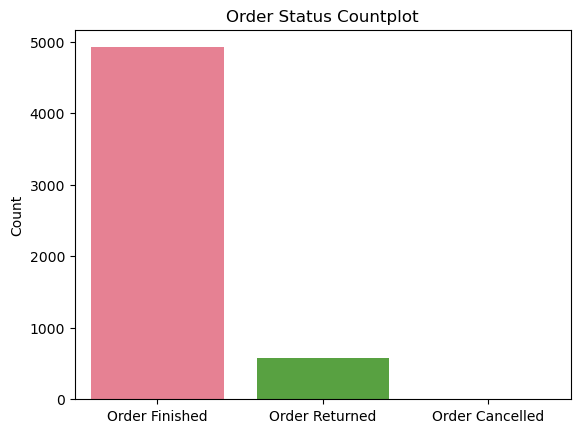

In [805]:
sns.countplot(data=df1, x='order_status', palette='husl')
plt.title('Order Status Countplot')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [806]:
df1['order_status'].value_counts()/df1.shape[0]*100

order_status
Order Finished     89.543553
Order Returned     10.401891
Order Cancelled     0.054555
Name: count, dtype: float64

## Product Category Countplot

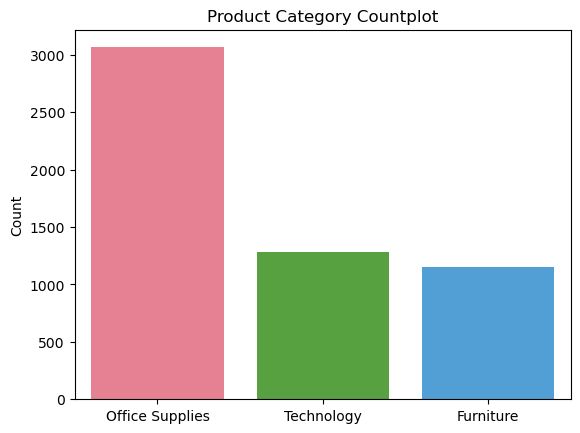

In [807]:
sns.countplot(data=df1, x='product_category', palette='husl')
plt.title('Product Category Countplot')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

## Product Subcategory Countplot

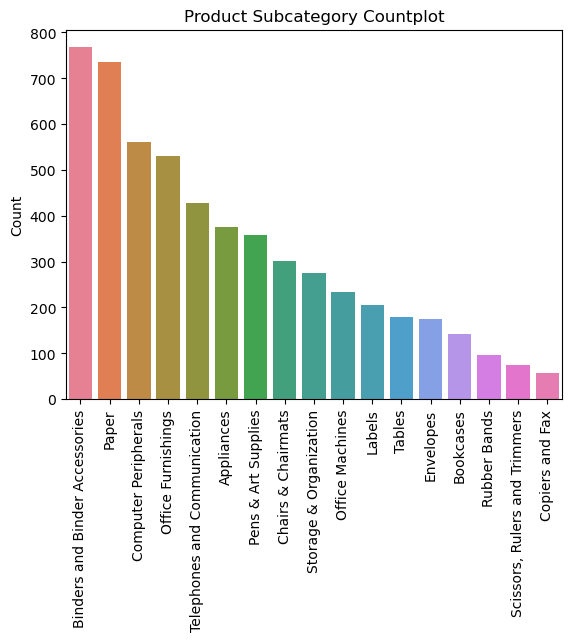

In [808]:
subcategory_order = df1['product_subcategory'].value_counts().index

sns.countplot(data=df1, x='product_subcategory', order=subcategory_order, palette='husl')
plt.title('Product Subcategory Countplot')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [809]:
subcategory_order = df1['product_subcategory'].value_counts().index.tolist()


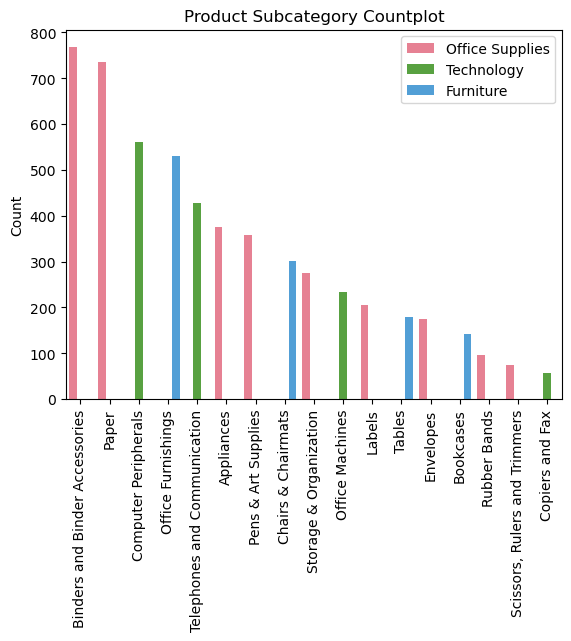

In [810]:
sns.countplot(data=df1, x='product_subcategory', hue='product_category',  order=subcategory_order, palette='husl')
plt.title('Product Subcategory Countplot')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='')
plt.show()

In [811]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             5499 non-null   int64         
 1   order_status         5499 non-null   object        
 2   customer             5499 non-null   object        
 3   order_date           5499 non-null   datetime64[ns]
 4   order_quantity       5499 non-null   int64         
 5   sales                5499 non-null   int64         
 6   discount             5499 non-null   float64       
 7   discount_value       5499 non-null   int64         
 8   product_category     5499 non-null   object        
 9   product_subcategory  5499 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 429.7+ KB


In [812]:
df1['customer'].nunique()

777

## Top 10 Customers

In [813]:
top10_customer = df1.groupby('customer')['sales'].sum().sort_values(ascending=False).head(10)
top10_customer

customer
Emily Phan                220589920
Christina Vanderzanden    186631624
Deborah Brumfield         182192930
Grant Carroll             170382287
Sylvia Foulston           156170673
Roy Skaria                152857851
Bill Donatelli            147916757
Philip Brown              142536705
Alejandro Grove           139242520
Darren Budd               120043653
Name: sales, dtype: int64

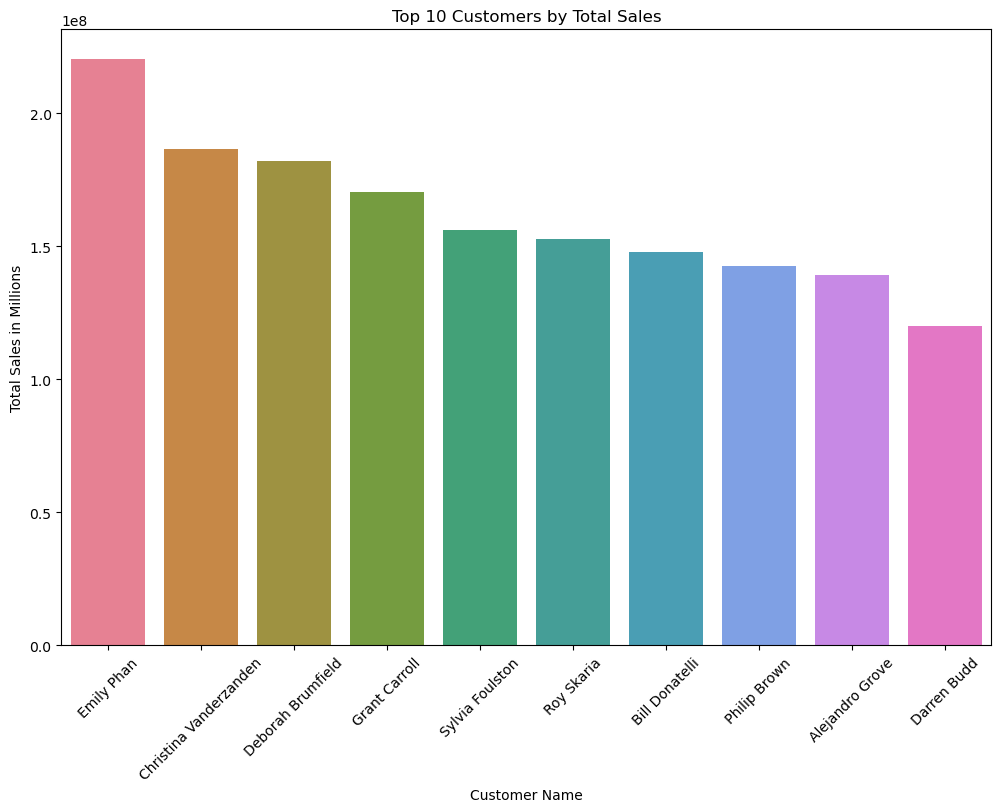

In [814]:
# Convert to DataFrame for Seaborn
top10_customer_df = top10_customer.reset_index()
top10_customer_df.columns = ['customer', 'total_sales']

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top10_customer_df, x='customer', y='total_sales', palette='husl')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales in Millions')
plt.xticks(rotation=45)
plt.show()

## Feb, 2009 Generated the Most Revenue in a Month

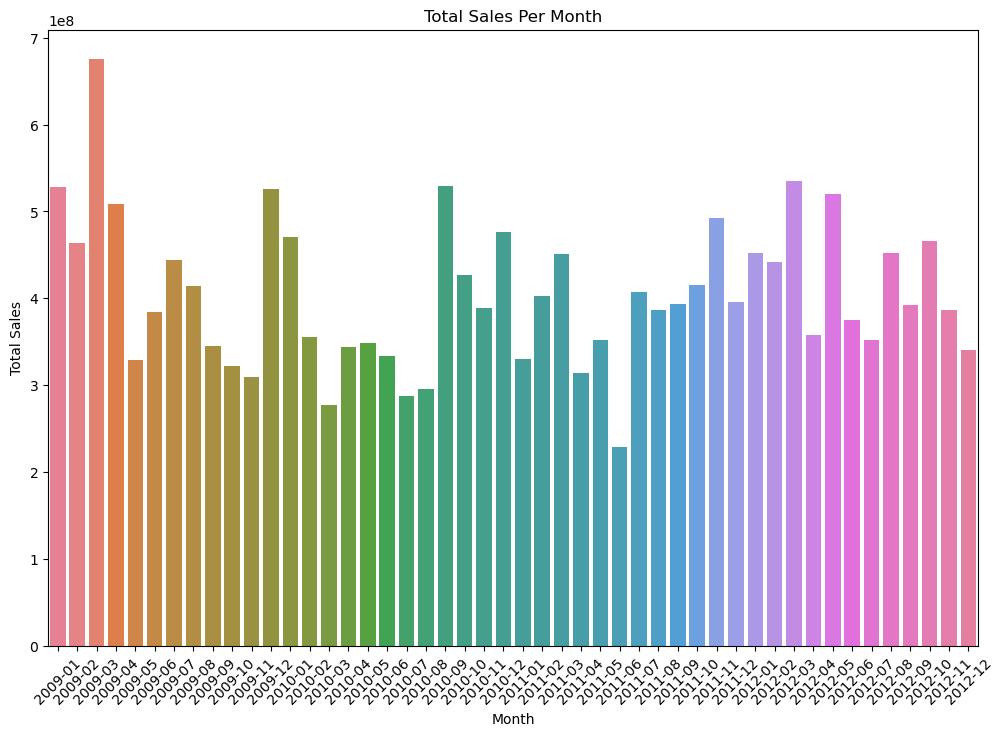

In [815]:
# Extract month and year from 'order_date'
df1['month'] = df1['order_date'].dt.to_period('M')

# Sum of sales per month
monthly_sales = df1.groupby('month')['sales'].sum()

# Convert Series to DataFrame for Seaborn
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df.columns = ['month', 'total_sales']

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=monthly_sales_df, x='month', y='total_sales', palette='husl')
plt.title('Total Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## Most Revenue Generated in 2009

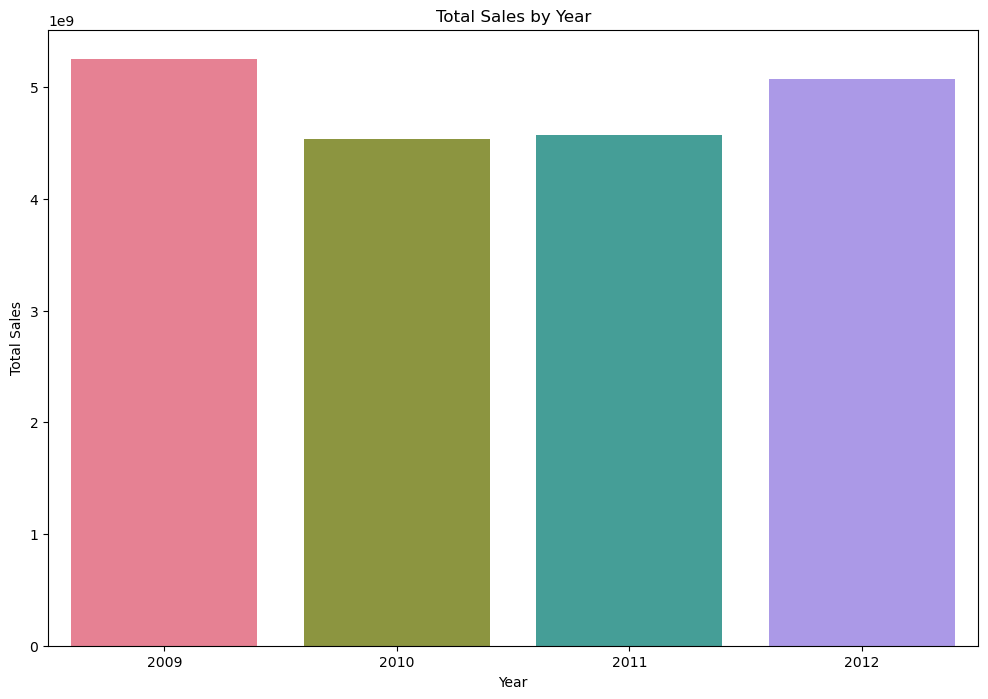

In [816]:
# Extract year from 'order_date'
df1['year'] = df1['order_date'].dt.year

# Sum sales per year
annual_sales = df1.groupby('year')['sales'].sum()

# Convert Series to DataFrame for Seaborn
annual_sales_df = annual_sales.reset_index()
annual_sales_df.columns = ['year', 'total_sales']

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=annual_sales_df, x='year', y='total_sales', palette='husl')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

## 1. Total Sales

In [817]:
df1['sales'].sum()

19427074751

## 2. Total Orders

In [818]:
df1['order_id'].count()

5499

## 3. Average Order Value (AOV)

In [819]:
round(df1['sales'].mean(),0)

3532838.0

## 4. Total Discounts

In [820]:
df1['discount_value'].sum()

954102735

## 5. Total Discount Value

In [821]:
df1['discount_value'].mean()

173504.77086743043

## 6. Total Sales After Discounts

In [822]:
df1['sales'].sum() - df1['discount_value'].sum()

18472972016

## 7. Sales by Product Category

In [823]:
df1.groupby('product_category')['sales'].sum().sort_values(ascending=False)

product_category
Technology         7422758843
Furniture          6655751588
Office Supplies    5348564320
Name: sales, dtype: int64

## 8. Sales by Product Subcategory

In [824]:
df1.groupby('product_subcategory')['sales'].sum().sort_values(ascending=False)

product_subcategory
Office Machines                   2992042700
Chairs & Chairmats                2796723780
Tables                            1823721028
Telephones and Communication      1759096403
Binders and Binder Accessories    1684448160
Copiers and Fax                   1469965760
Storage & Organization            1317117740
Appliances                        1238552900
Computer Peripherals              1201653980
Bookcases                         1148115720
Office Furnishings                 887191060
Paper                              515461960
Envelopes                          242269680
Pens & Art Supplies                196486220
Scissors, Rulers and Trimmers       83269460
Labels                              54624320
Rubber Bands                        16333880
Name: sales, dtype: int64

## 9. Sales by Customer

In [825]:
df1.groupby('customer')['sales'].sum().sort_values(ascending=False).head(10)

customer
Emily Phan                220589920
Christina Vanderzanden    186631624
Deborah Brumfield         182192930
Grant Carroll             170382287
Sylvia Foulston           156170673
Roy Skaria                152857851
Bill Donatelli            147916757
Philip Brown              142536705
Alejandro Grove           139242520
Darren Budd               120043653
Name: sales, dtype: int64

## 10. Order Quantity by Product Category

In [826]:
df1.groupby('product_category')['order_quantity'].sum().sort_values(ascending=False)

product_category
Office Supplies    78422
Technology         32611
Furniture          29310
Name: order_quantity, dtype: int64

## 11. Order Quantity by Product Subcategory

In [827]:
df1.groupby('product_subcategory')['order_quantity'].sum().sort_values(ascending=False)

product_subcategory
Binders and Binder Accessories    19466
Paper                             18340
Computer Peripherals              14269
Office Furnishings                13687
Telephones and Communication      11395
Pens & Art Supplies                9681
Appliances                         9308
Chairs & Chairmats                 7568
Storage & Organization             7030
Office Machines                    5484
Labels                             5179
Envelopes                          4620
Tables                             4433
Bookcases                          3622
Rubber Bands                       2682
Scissors, Rulers and Trimmers      2116
Copiers and Fax                    1463
Name: order_quantity, dtype: int64

## 12. Order Status Breakdown 

In [828]:
df1['order_status'].value_counts()

order_status
Order Finished     4924
Order Returned      572
Order Cancelled       3
Name: count, dtype: int64

## 13. Monthly Sales Trend

In [829]:
df1['month_only'] = df1['month'].dt.month
df1 = df1.drop(columns=['month'])
df1 = df1.rename(columns={'month_only': 'month'})

In [830]:
df1.groupby('month')['sales'].sum()

month
1     1782068853
2     1664400513
3     1939128117
4     1524384925
5     1549452537
6     1322027913
7     1490649422
8     1548486326
9     1660224131
10    1629951220
11    1577706337
12    1738594457
Name: sales, dtype: int64

## 14. Customer Rentention Rate

In [831]:
# Counts of each unique customer
customer_count = df1['customer'].value_counts()

# Number of customers who made multiple purchases
repeats = customer_count[customer_count >1].count()

# Total number of unique customers
total = customer_count.count()

retention_rate = repeats / total * 100
print(f'Retention Rate: {retention_rate:.2f}%')

Retention Rate: 98.07%


## 15. Sales Per Order

In [832]:
df1.groupby('order_id')['sales'].sum().mean()

3534766.148289665

## 16. Revenue Per Customer

In [833]:
df1.groupby('customer')['sales'].sum().mean()

25002670.207207207